# Prédiction des salaires à partir des descriptions de postes

* Dataset: [source sur kaggle](https://www.kaggle.com/datasets/nikhilbhathi/data-scientist-salary-us-glassdoor)
* EDA: [notebook](https://www.kaggle.com/code/nikhilbhathi/100-insights-data-science-jobs-eda)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%config IPCompleter.greedy = True
%matplotlib inline

In [ ]:
# ! pip install kaggle
# To use Kaggle API you need first to get your token:
# - log in to kaggle.com
# - go to your profile page
# - scroll down to the API section
# - click "Create new API tocken" to get your kaggle.json file

In [ ]:
! kaggle datasets download -d nikhilbhathi/data-scientist-salary-us-glassdoor

In [ ]:
import zipfile, os

data_file = "data-scientist-salary-us-glassdoor.zip"
with zipfile.ZipFile(data_file,"r") as zip_ref:
    zip_ref.extractall("data/")
os.remove(data_file)

In [2]:
df = pd.read_csv("./data/data_cleaned_2021.csv")
df.shape

(742, 42)

In [3]:
df.head(5)

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,tensor,hadoop,tableau,bi,flink,mongo,google_an,job_title_sim,seniority_by_title,Degree
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 - 1000,1973,...,0,0,1,1,0,0,0,data scientist,na,M
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+,1984,...,0,0,0,0,0,0,0,data scientist,na,M
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 - 1000,2010,...,0,0,0,0,0,0,0,data scientist,na,M
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 - 5000,1965,...,0,0,0,0,0,0,0,data scientist,na,na
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 - 200,1998,...,0,0,0,0,0,0,0,data scientist,na,na


In [4]:
df['Job Title'].value_counts()

Data Scientist                     131
Data Engineer                       53
Senior Data Scientist               34
Data Analyst                        15
Senior Data Engineer                14
                                  ... 
Data Scientist/ML Engineer           1
Sr. Data Scientist                   1
Data Engineer 4 - Contract           1
Data Analyst - Asset Management      1
Machine Learning Engineer (NLP)      1
Name: Job Title, Length: 264, dtype: int64

In [5]:
df.columns

Index(['index', 'Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Hourly', 'Employer provided', 'Lower Salary', 'Upper Salary',
       'Avg Salary(K)', 'company_txt', 'Job Location', 'Age', 'Python',
       'spark', 'aws', 'excel', 'sql', 'sas', 'keras', 'pytorch', 'scikit',
       'tensor', 'hadoop', 'tableau', 'bi', 'flink', 'mongo', 'google_an',
       'job_title_sim', 'seniority_by_title', 'Degree'],
      dtype='object')

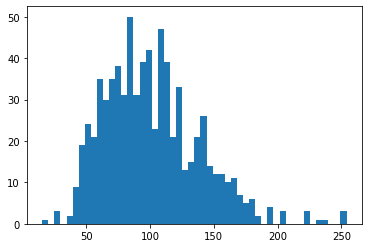

<Figure size 1440x360 with 0 Axes>

In [11]:
# Vérifier que la distribution de la variable cible ressemble à une distribution normale
plt.hist(df["Avg Salary(K)"], bins=50)
# plt.figure(figsize=(20,5))
plt.show()

TODO :

* Utilisez l'algorithme `Ridge`.
* Utilisez la métrique $R^2$ pour évaluer le modèle.
* Encodez la variable `Job Description` avec `TF-IDF`.
* Testez des différentes valeurs de hyperparamètres afin d'essayer d'améliorer la qualité du modèle :
    * le paramètre de la régularisation pour l'algorithme `Ridge`
    * `min_df`, `max_df`, `ngram_range` pour `TF-IDF`.
* Calculez la valeur de la métrique d'évaluation sur les données d'entraînement et les données de test.

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

from sklearn.linear_model import Ridge

## data preprocessing

In [15]:
tfidf_vector = TfidfVectorizer(stop_words='english', max_features=None, max_df=0.6, min_df=2, ngram_range=(1,1) )

# features
X = df['Job Description']
y = df['Avg Salary(K)']

# data_cleaned = []
# for doc in X:
#     doc_cleaned = ' '.join(word for word in doc.split() if word.isalpha())
#     data_cleaned.append(doc_cleaned)


# # standard nltk lemmatizer
# from nltk.stem import WordNetLemmatizer
# lemmatizer = WordNetLemmatizer()

# def clean_text(data):
#     data_cleaned = []
#     for doc in data:
#         doc = doc.lower()
#         # lemmatize word and retain all letter-only words except names
#         doc_cleaned = ' '.join(lemmatizer.lemmatize(word) for word in doc.split() if word.isalpha())
#         data_cleaned.append(doc_cleaned)

#     return data_cleaned
# X = clean_text(data_cleaned)

# transform
# X = tfidf_vector.fit_transform(X)


#slpiting
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = tfidf_vector.fit_transform(X_train)
X_val = tfidf_vector.transform(X_val)

#model
model = Ridge(alpha=0.0999)
model = model.fit(X_train,y_train)

#evaluation
y_val_pred = model.predict(X_val)
score = model.score(X_val, y_val)
print('R2 score', score)

R2 score 0.8093710946971326


##### feature and target

A l'aide de votre modèle, faites des prédictions de salaire pour les très courtes descriptions de postes :

* `'Director'`
* `'Manager'`
* `'Data Scientist'`
* `'Data Engineer'`
* `'Machine Learning Engineer'`

In [16]:
X_test = ['Director', 'Manager', 'Data Scientist', 'Data Engineer', 'Machine Learning']
X2 =['Director', 'Manager', 'Data Scientist', 'Data Engineer', 'Machine Learning']
X_test = pd.Series(X_test)
X_test = tfidf_vector.transform(X_test)


In [17]:
y_test_pred = model.predict(X_test)

In [18]:
pred = pd.DataFrame()
pred['JOb'] = X2
pred['Sal'] = y_test_pred
pred

,JOb,Sal
0,Director,116.516474
1,Manager,87.443132
2,Data Scientist,124.861096
3,Data Engineer,90.564148
4,Machine Learning,129.239184


Affichez les 10 features les plus importantes pour votre modèle.

In [251]:
# your code here

g_index= clf.coef_.argsort()[-10:][::-1]
g_index

array([3212, 6509,  345, 5509, 3361,  982, 5632, 1442, 3828, 4235],
      dtype=int64)

In [249]:
for index in g_index:
    print(f' feature : {index} :', {tfidf_vector.get_feature_names_out()[index]})

 feature : 3212 : {'gallup'}
 feature : 6509 : {'scientists'}
 feature : 345 : {'actuarial'}
 feature : 5509 : {'platform'}
 feature : 3361 : {'grand'}
 feature : 982 : {'biomarker'}
 feature : 5632 : {'predictive'}
 feature : 1442 : {'climate'}
 feature : 3828 : {'infrastructure'}
 feature : 4235 : {'lead'}


In [20]:
# pp = [[1,5, 8]]
print(*pp)

[1, 5, 8]
